## Data Overview
Our analyses focus on data reported by Lohnas & Kahana (2014) to evaluate a retrieved context account of spacing and repetition effects in free recall. Across 4 sessions, 35 subjects performed delayed free recall of 48 lists. Subjects were University of Pennsylvania undergraduates, graduates and staff, age 18-32. List items were drawn from a pool of 1638 words taken from the University of South Florida free association norms (Nelson, McEvoy, & Schreiber, 2004; Steyvers, Shiffrin, & Nelson, 2004, available at http://memory.psych.upenn.edu/files/wordpools/PEERS_wordpool.zip). Within each session, words were drawn without replacement. Words could repeat across sessions so long as they did not repeat in two successive sessions. Words were also selected to ensure that no strong semantic associates co-occurred in a given list (i.e., the semantic relatedness between any two words on a given list, as determined using WAS (Steyvers et al., 2004), did not exceed a threshold value of 0.55).

Subjects encountered four different types of lists: 
1. Control lists that contained all once-presented items;  
2. pure massed lists containing all twice-presented items; 
3. pure spaced lists consisting of items presented twice at lags 1-8, where lag is defined as the number of intervening items between a repeated item's presentations; 
4. mixed lists consisting of once presented, massed and spaced items. Within each session, subjects encountered three lists of each of these four types. 

In each list there were 40 presentation positions, such that in the control lists each position was occupied by a unique list item, and in the pure massed and pure spaced lists, 20 unique words were presented twice to occupy the 40 positions. In the mixed lists 28 once-presented and six twice-presented words occupied the 40 positions. In the pure spaced lists, spacings of repeated items were chosen so that each of the lags 1-8 occurred with equal probability. In the mixed lists, massed repetitions (lag=0) and spaced repetitions (lags 1-8) were chosen such that each of the 9 lags of 0-8 were used exactly twice within each session. The order of presentation for the different list types was randomized within each session. For the first session, the first four lists were chosen so that each list type was presented exactly once. An experimenter sat in with the subject for these first four lists, though no subject had difficulty understanding the task. The data for this experiment is stored in `data/repFR.mat`.

In [1]:
from compmemlearn.datasets import prepare_lohnas2014_data

trials, events, list_length, presentations, list_types, rep_data, subjects = prepare_lohnas2014_data(
    '../../../data/repFR.mat')

events.head()

,subject,list,item,input,output,study,recall,repeat,intrusion,condition
0,1,1,0,1,1.0,True,True,0,False,4
1,1,1,1,2,2.0,True,True,0,False,4
2,1,1,2,3,3.0,True,True,0,False,4
3,1,1,3,4,4.0,True,True,0,False,4
4,1,1,4,5,5.0,True,True,0,False,4


### Benchmark Summary Statistics
With some modifications to their codebase, I can extract benchmark summary statistics -- serial position curve, lag-CRP curve, PFR curve, stop probability -- from each condition of this dataset.

In [2]:
from compmemlearn.analyses import flex_mixed_spc, flex_mixed_crp, flex_mixed_pfr, fast_csp, alternative_contiguity, rpl
import matplotlib.pyplot as plt
import numpy as np
conditions = ['Control', 'Massed', 'Spaced', 'Mixed']


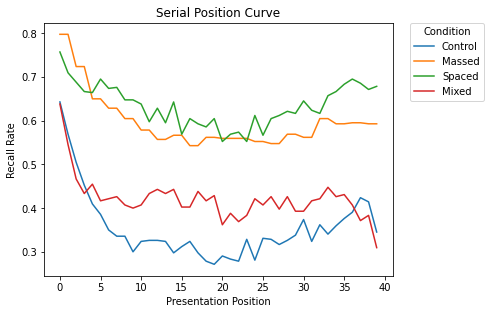

In [3]:
plt.figure(figsize=(7.5, 5))

for condition in range(4):
    test_spc= flex_mixed_spc(trials[list_types==condition+1], presentations[list_types==condition+1])
    plt.plot(np.arange(len(test_spc)), test_spc, label=conditions[condition])

plt.title('Serial Position Curve')
plt.xlabel('Presentation Position')
plt.ylabel('Recall Rate')    
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout(pad=3)

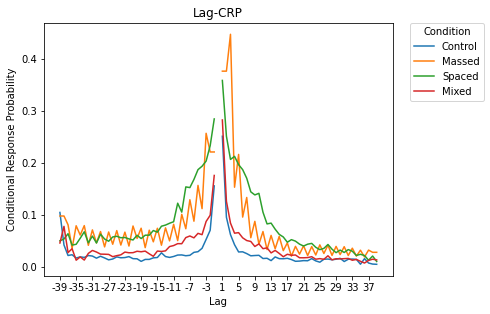

In [4]:
plt.figure(figsize=(7.5, 5))

for condition in range(4):
    test_crp= flex_mixed_crp(trials[list_types==condition+1], presentations[list_types==condition+1])
    test_crp[len(presentations[0])-1] = np.nan
    plt.plot(np.arange(len(test_crp)), test_crp, label=conditions[condition])

plt.title('Lag-CRP')
plt.xlabel('Lag')
plt.ylabel('Conditional Response Probability')   
plt.xticks(np.arange(0, len(test_crp), 4), np.arange(0, len(test_crp), 4) - 39)    
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout(pad=3)

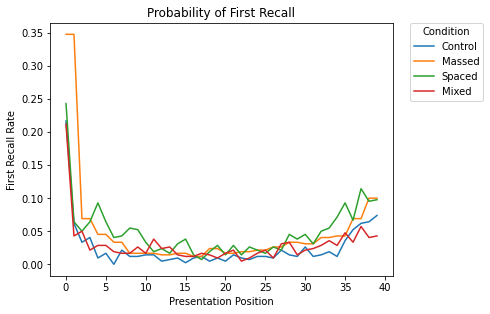

In [5]:
plt.figure(figsize=(7.5, 5))

for condition in range(4):
    test_pfr= flex_mixed_pfr(trials[list_types==condition+1], presentations[list_types==condition+1])
    plt.plot(np.arange(list_length), test_pfr, label=conditions[condition])

plt.title('Probability of First Recall')
plt.xlabel('Presentation Position')
plt.ylabel('First Recall Rate')    
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout(pad=3)

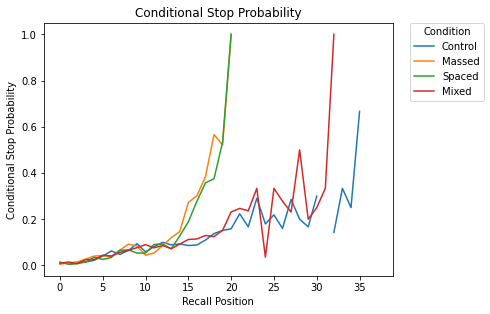

In [6]:
plt.figure(figsize=(7.5, 5))

for condition in range(4):
    test_csp = fast_csp(trials[list_types==condition+1], list_length)
    test_csp[test_csp==0] = np.nan
    plt.plot(np.arange(list_length+1), test_csp, label=conditions[condition])

plt.xlabel('Recall Position')
plt.ylabel('Conditional Stop Probability')
plt.title('Conditional Stop Probability')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout(pad=3)

## Repetition Effects

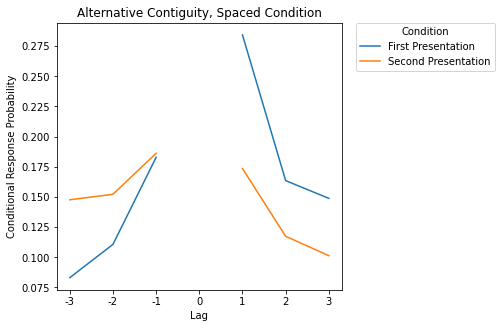

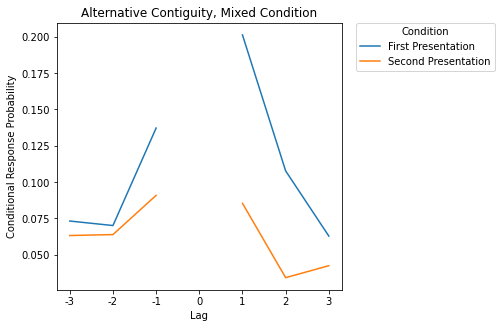

In [7]:
for condition in range(2, 4):
    plt.figure(figsize=(7.5, 5))
    test_altcrp= alternative_contiguity(
        trials[list_types==condition+1], presentations[list_types==condition+1], 6, 2)
    test_altcrp[:, len(presentations[0])-1] = np.nan
    plt.plot(np.arange(7), test_altcrp[0][list_length-1-3:list_length-1+4], label='First Presentation')
    plt.plot(np.arange(7), test_altcrp[1][list_length-1-3:list_length-1+4], label='Second Presentation')
    plt.xticks(np.arange(7), np.arange(7) -3)   
    plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Alternative Contiguity, ' + conditions[condition] + ' Condition')
    plt.tight_layout(pad=3)
    plt.xlabel('Lag')
    plt.ylabel('Conditional Response Probability')   


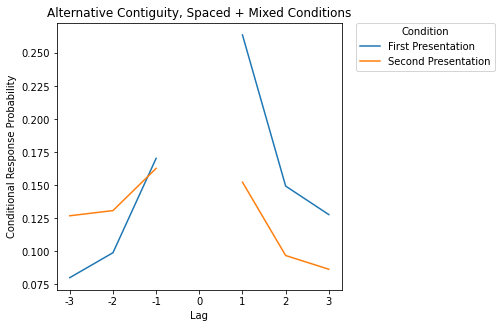

In [8]:
plt.figure(figsize=(7.5, 5))
test_altcrp= alternative_contiguity(
    trials[list_types>=3], presentations[list_types>=3], 6, 2)
test_altcrp[:, len(presentations[0])-1] = np.nan
plt.plot(np.arange(7), test_altcrp[0][list_length-1-3:list_length-1+4], label='First Presentation')
plt.plot(np.arange(7), test_altcrp[1][list_length-1-3:list_length-1+4], label='Second Presentation')
plt.xticks(np.arange(7), np.arange(7) -3)    
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Alternative Contiguity, Spaced + Mixed Conditions')
plt.tight_layout(pad=3)
plt.xlabel('Lag')
plt.ylabel('Conditional Response Probability');

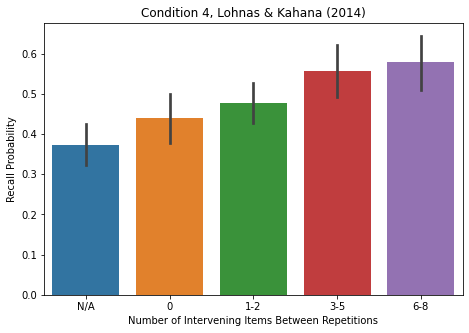

In [9]:
import seaborn as sns

condition = 4
source = 'Lohnas & Kahana (2014)'

subject_count = len(np.unique(events.subject))
trial_count = int(np.max(events.list)/4)

data = rpl(
    presentations[list_types==condition], trials[list_types==condition], 
    subject_count, trial_count, list_length)

plt.figure(figsize=(7.5, 5))
sns.barplot(data=data, x='lag', y='prob')

plt.title('Condition {}, {}'.format(condition, source))
plt.xlabel('Number of Intervening Items Between Repetitions')
plt.ylabel('Recall Probability');

Still debugging:
- OR Score (not really a repetition effect, though!)
- Transition Rate Between Neighbors of Item Repetitions